# Climate - MALIN HEAD
---
In this notebook, I will analyse the meteorological conditions collected in the Malin Head station, in Donegal County, Ireland. This information was extracted by Met Éireann and can be found in the following link. I downloaded the data into the CSV folder.

https://cli.fusio.net/cli/climate_data/webdata/hly1575.zip


## Load the data
To analyse the data with Python, the package pandas has to be imported. Then the csv file can be loaded into the program with pd.read_csv, using the path and the name of the file. Then I noticed that the indices are located in row 24, so I needed to skip the first 23 rows. I also used low_memory=False because it was showing a DtypeWarning when loading the CSV. This means that the DataFrame it's very long with mixed data types in some columns, so to avoid the machine to deduce of some results, this parameter is set to False.

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
https://pandas.pydata.org/docs/reference/api/pandas.errors.DtypeWarning.html

In [1]:
# Import libraries.
import pandas as pd

In [2]:
# Name of the file.
FILENAME = "hly1575.csv"

# Path to the file.
DATADIR = "./csv/"

# Identify the file.
logFilename = DATADIR + FILENAME

# Load the csv.
df = pd.read_csv(logFilename, skiprows=23, low_memory=False)

# Check the first 3 rows.
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-may-1955 01:00,0,0.0,0,8.5,0,7.2,5.5,9.1,83,...,0,11,0,130,3,2,0.0,30000,40,7
1,01-may-1955 02:00,0,0.0,0,8.2,0,7.2,6.1,9.3,85,...,0,11,0,120,1,2,0.0,30000,100,6
2,01-may-1955 03:00,3,0.0,0,7.3,0,6.6,5.5,9.3,91,...,0,8,0,120,1,2,0.0,30000,220,5


## Analyse the data

In this part I checked the data types and if there's any missing or invalid data. This is very important to know if the data needs to be cleaned before doing a deep analysis of the variables.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
https://stackoverflow.com/questions/49677060/pandas-count-empty-strings-in-a-column/77288170#77288170

In [3]:
# Check variable types.
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb      object
dewpt     object
vappr     object
rhum      object
msl      float64
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun       object
vis       object
clht      object
clamt     object
dtype: object

In [4]:
# Check if there are any missing values in the data set.
df.isnull().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [5]:
# Check if there are any empty values.
df.eq(" ").sum()

date          0
ind           0
rain          3
ind.1         0
temp          0
ind.2         0
wetb          6
dewpt         6
vappr         6
rhum          6
msl           0
ind.3         0
wdsp         52
ind.4         0
wddir       106
ww       130148
w        130148
sun      130032
vis      130228
clht     130172
clamt    130172
dtype: int64

In [6]:
# check if there are "0" values.
df.eq(0).sum()

date          0
ind      488318
rain          0
ind.1    607604
temp        276
ind.2    605431
wetb          0
dewpt         0
vappr         0
rhum          0
msl           0
ind.3    173882
wdsp          0
ind.4    173883
wddir         0
ww            0
w             0
sun           0
vis           0
clht          0
clamt         0
dtype: int64

## Wind speed for energy production.

Now that the data has been analysed, there are some variables that show some interest and might have some potential for energy production in this location, for example, installation of windmills. For this I will check if the wind speed registered was good enough in the past years for windmills and if it's a good location to install them.
As the Irish Wind Energy Association stated, the minimum wind speed necessary to produce energy at Beaufort Scale (BS) 3, 7 knots, and maximum output is reached at BS 5, 21 knots. When the wind speed is higher than BS 10, 48 knots, the wind turbines stop working to prevent damage. 


http://www.iwea.ie/index.cfm/page/technicalfaqs?#q29
https://www.met.ie/forecasts/marine-inland-lakes/beaufort-scale
https://www.met.ie/cms/assets/uploads/2022/09/Beaufort-scale-for-land.png

To check the wind speed over time, the "date" variable needs to be converted to datetime object to have a clear plot of the time, otherwise machine will treat it like an object and won't recognise periods of time. After that, I identify the days and the months with .dt.strftime.

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html

In [7]:
#  Use datetime to treat the column "date" as datetime object.
df["date"]= pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M")

In [8]:
# select the days.
days= df["date"].dt.strftime("%Y-%m-%d")

# Select the months.
months= df["date"].dt.strftime("%Y-%m")

# year= df["date"].dt.strftime("%Y")

After that, I created a new DataFrame with only date and wind speed to simplify. Then I drop the empty values from the wind speed. The variable wind speed is identified as an object, so I changed it to numeric, as speed is always a number. After that, I dropped the "0" values, and even though the wind speed can be 0, this is very uncommon so I discarded those values.

https://stackoverflow.com/questions/64890665/how-do-i-fix-this-type-error-value-must-be-an-instance-of-str-or-bytes-not-a#comment114730210_64890983

In [9]:
# New data frame with date and wind speed.
dfwp=df[["date","wdsp"]]

# Drop the empty values.
dfwp = dfwp[dfwp["wdsp"] != " "]

# Change the "wdsp" type from object to int.
dfwp["wdsp"] = pd.to_numeric(dfwp["wdsp"], errors="coerce")

# Drop the 0 values.
dfwp = dfwp[dfwp["wdsp"] != 0]

# Show.
dfwp

,date,wdsp
0,1955-05-01 01:00:00,11
1,1955-05-01 02:00:00,11
2,1955-05-01 03:00:00,8
3,1955-05-01 04:00:00,18
4,1955-05-01 05:00:00,9
...,...,...
609283,2024-10-31 20:00:00,12
609284,2024-10-31 21:00:00,13
609285,2024-10-31 22:00:00,13
609286,2024-10-31 23:00:00,14


### Daily mean wind speed

To examine the wind speed in the last years, the best way to check is with plots. These are generated through Matplotlib and Seaborn. 

This DataFrame is very long and instead of considering each entry, I calculated the daily wind speed mean to make the plot easier to read. The code .groupby puts all the data of a day together and .transform calculates the mean for this group.
After that, I created a new column with the daily mean wind speed.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html


In [10]:
# Import Matplotlib and Seaborn libraries.
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Calculate the daily wind speed mean.
daily_mean_wind = dfwp.groupby(days)["wdsp"].transform("mean")

# Create a new column.
dfwp["daily_mean_wind"] = daily_mean_wind

# Check
dfwp.head(3)

,date,wdsp,daily_mean_wind
0,1955-05-01 01:00:00,11,19.434783
1,1955-05-01 02:00:00,11,19.434783
2,1955-05-01 03:00:00,8,19.434783


For the plots, I customized the size of them with plt.rcParams and this sets the default size for all the upcoming plots. Then I created a function with the grid parameters, to make it nicer to read. I included minor ticks; grid lines; two x lines representing the minimum and the optimal wind speeds for energy production; and annotations for the minimum and optimal wind speeds.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
https://www.geeksforgeeks.org/plot-a-horizontal-line-in-matplotlib/
https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html

In [12]:
# Set the size of the figure.
plt.rcParams["figure.figsize"] = (20, 10)

# Define the grid parameters to use in the plots.
def grid():
    plt.minorticks_on() # Minor ticks between the main ticks.
    plt.grid(which="both", linestyle="--") # Configure the grid lines.
    plt.axhline(y = 7, color = 'r', linestyle = '-') # X line representing the minimum wind speed for energy production.
    plt.axhline(y = 28, color = 'g', linestyle = ':') # X line representing the maximum wind speed for energy production.
    plt.annotate("MIN", xy=(-6000, 7), xycoords='data', xytext=(0, -30), textcoords='offset points', size=10, 
             bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=-90,rad=10")) # Annotation for the minimum wind speed.
    plt.annotate("Optimal", xy=(-6000, 28), xycoords='data', xytext=(0, 30), textcoords='offset points', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=45,rad=10")) # Annotation for the optimal wind speed.

I added separately the x line and the annotation for the maximum wind speed because they were making the following plots smaller.
To plot, I called the grid function, added a title and showed it with sns.lineplot.

https://seaborn.pydata.org/generated/seaborn.lineplot.html

<Axes: title={'center': 'Daily mean wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

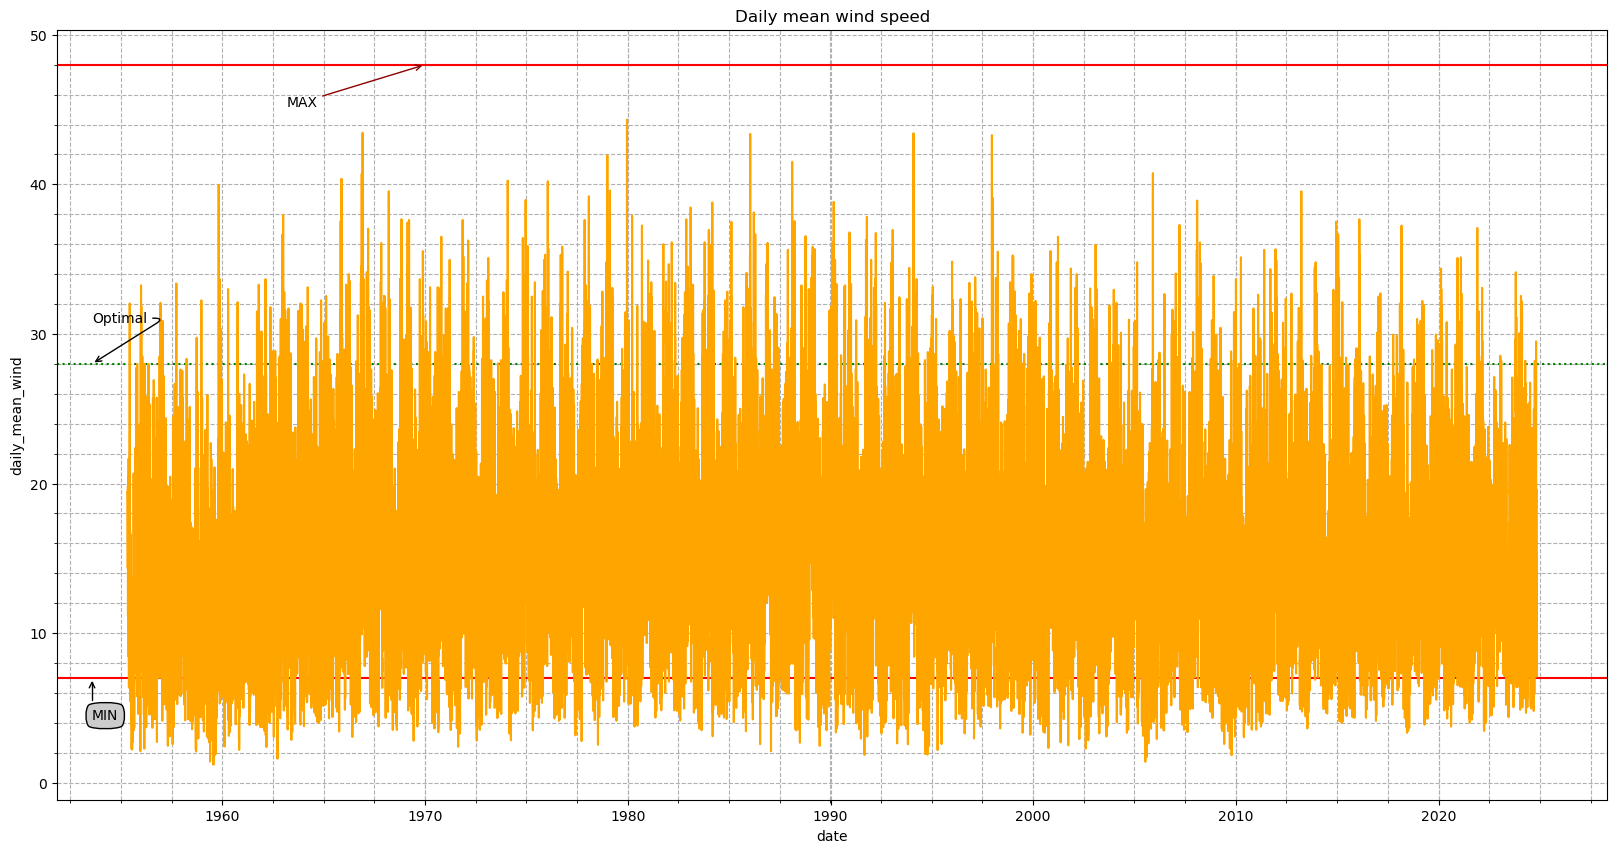

In [13]:
# Add x line representing the maximum wind speed for energy production.
plt.axhline(y = 48, color = 'r', linestyle = '-')

# Add annotation for the maximum wind speed.
plt.annotate("MAX", xy=(0,48), xytext=(-100, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='darkred'))

# Apply grid.
grid()

# Add title.
plt.title("Daily mean wind speed")

# Plot.
sns.lineplot(data=dfwp, x="date", y="daily_mean_wind", color="orange")

The graph shows that it would be possible to produce energy in the past years considering the wind speed in this location. There are some days that the wind speed wasn't enough, but in the majority of the days that would happen, and some days the optimal energy could be reached. None of the days had very high wind speeds, and that indicates that the windmills wouldn't suffer too much damage over time.

### Monthly mean wind speed
In this next plot, I checked the monthly mean wind speed. I used the same codes as above, but this time I selected the months instead of the days. This shows if there could be any month without energy production.

In [14]:
# Calculate the monthly wind speed mean.
monthly_mean_wind = dfwp.groupby(months)["wdsp"].transform("mean")

# Create a new column.
dfwp["monthly_mean_wind"] = monthly_mean_wind

# Check.
dfwp.head(3)

,date,wdsp,daily_mean_wind,monthly_mean_wind
0,1955-05-01 01:00:00,11,19.434783,14.651351
1,1955-05-01 02:00:00,11,19.434783,14.651351
2,1955-05-01 03:00:00,8,19.434783,14.651351


<Axes: title={'center': 'Monthly mean wind speed'}, xlabel='date', ylabel='monthly_mean_wind'>

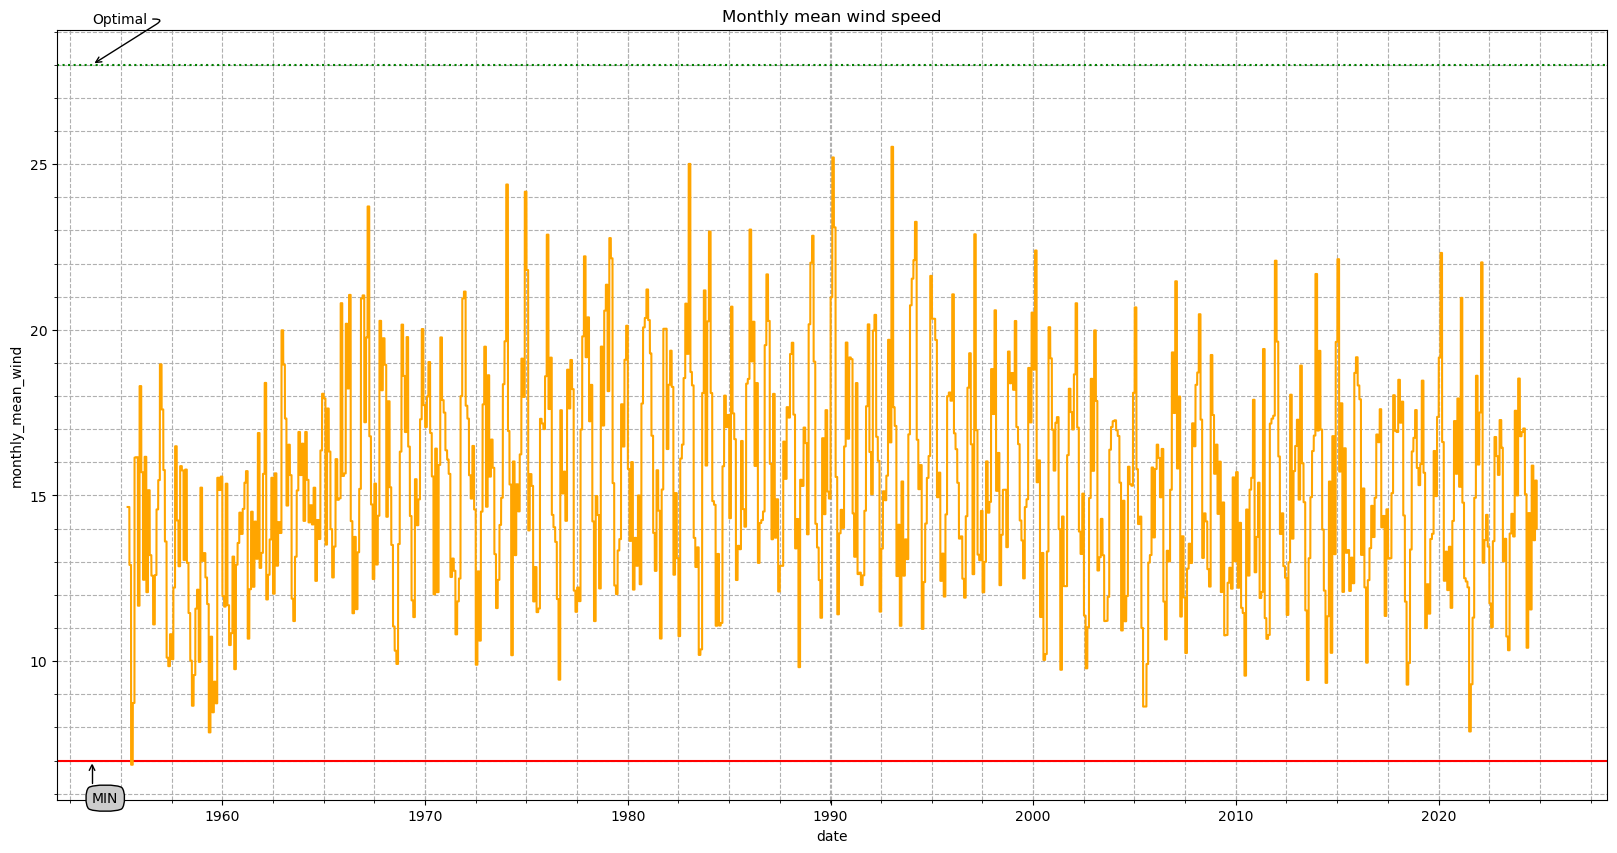

In [15]:
# Add grid.
grid()

# Add title.
plt.title("Monthly mean wind speed")

# Plot.
sns.lineplot(data=dfwp, x="date", y="monthly_mean_wind", color="orange")

The graph shows that there was a month in the 1950s when the wind speed wasn't enough to produce energy. It also shows that none of the months was achieving the optimal wind speed.

### Convert wind speed into power generated

In this section, I calculated the hypothetical energy production for each windmill. For this, I considered the following equation:
https://www.geeksforgeeks.org/wind-energy-formula/


$P = 1/2 x ρ x A x v^3$

- $P = Power (W)$
- $ρ = Density  (kg/m^3)$
- $A = Swept Area  (m^2)$
- $v = Wind Speed  (m/s)$

After that, I considered the standard density of air, which is equal to $1.225 kg/m^3$.
https://www.e-education.psu.edu/emsc297/node/649

Then for the swept area, I needed to set the dimensions of the wind turbines. The European Wind Energy Association indicates that most wind turbine blades are around 50 meters in length.
https://www.ewea.org/wind-energy-basics/faq/#:~:text=How%20big%20is%20a%20wind,than%201%2C500%20average%20EU%20households

With this measurement, it's now possible to calculate the swept area of the turbine, with the following equation: $A = π × r^2 = π x 50^2= 7854 m^2$
https://mmpa.org/wp-content/uploads/2015/09/Swept-Area-Provided-by-Kid-Wind-PDF.pdf

The wind speed in this DataFrame is in knots, so I converted these values into miles per second in order to apply the energy production formula. The conversion is 1 knot = 0.51444 m/s.
https://en.wikipedia.org/wiki/Knot_(unit)

Before making this conversion, I filtered the wind speeds that don't produce any energy, so I didn't consider the values that are lower than 7 knots and higher than 48.
https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/

In [16]:
# print(max(dfwp["wdsp"]))
# https://realpython.com/python-min-and-max/#calling-min-and-max-with-a-single-iterable-argument

In [17]:
# Drop wind speeds that are lower than 7 knots.
dfwp = dfwp[dfwp["wdsp"] > 7]

# Drop the wind speeds that are higher than 48 knots.
dfwp = dfwp[dfwp["wdsp"] < 48]

So after selecting only the wind speeds that produce energy, I converted these into the miles per second. After that, I finally applied the formula representing the energy production divided by 1000, to get it in kilowatts, as 1 kW = 1000 W.

In [18]:
# Convert knots into miles per second.
dfwp["wdsp_ms"]= dfwp["wdsp"]* 0.51444

# Calculate energy produced in kilowatts.
dfwp["power_kw"]=(0.5*1.225*7854*dfwp["wdsp_ms"]**3)/1000

# Show the data.
dfwp

,date,wdsp,daily_mean_wind,monthly_mean_wind,wdsp_ms,power_kw
0,1955-05-01 01:00:00,11,19.434783,14.651351,5.65884,871.724464
1,1955-05-01 02:00:00,11,19.434783,14.651351,5.65884,871.724464
2,1955-05-01 03:00:00,8,19.434783,14.651351,4.11552,335.329020
3,1955-05-01 04:00:00,18,19.434783,14.651351,9.25992,3819.607118
4,1955-05-01 05:00:00,9,19.434783,14.651351,4.62996,477.450890
...,...,...,...,...,...,...
609283,2024-10-31 20:00:00,12,14.916667,15.448925,6.17328,1131.735442
609284,2024-10-31 21:00:00,13,14.916667,15.448925,6.68772,1438.902064
609285,2024-10-31 22:00:00,13,14.916667,15.448925,6.68772,1438.902064
609286,2024-10-31 23:00:00,14,14.916667,15.448925,7.20216,1797.153966


#### Daily mean power production
In this next section, I calculated the daily mean power produced, using again the codes .groupby and .transform. Then I created a new column with those values.

In [19]:
# Calculate the daily mean power.
daily_mean_power = dfwp.groupby(days)["power_kw"].transform("mean")

# Create a new column.
dfwp["daily_mean_power"] = daily_mean_power

After that, I plotted the energy generated in 4 different years, with 20 years apart from each other to see if there's a similar tendency. For this, I created a new variable with the years to check. Then I used a dictionary, df_year, to select all the data from those years. Then I set a figure to show 4 plots, with a 2x2 layout and chosen size. After that, I created a for function that outputs each year in one subplot, with added title and axes labels. Finally, I used plt.tight_layout to prevent the title and the axes labels from being too close to each other, which will make the plot cleaner.

https://www.kaggle.com/code/vascodegama/automated-seaborn-plot-functions
https://engineeringfordatascience.com/posts/matplotlib_subplots/#method-1-ravel
https://napsterinblue.github.io/notes/python/viz/subplots/
https://stackoverflow.com/questions/71160580/how-do-i-use-a-for-loop-and-the-zip-function-to-plot-subplots-in-python
https://aeturrell.github.io/coding-for-economists/vis-matplotlib.html
https://stackoverflow.com/questions/72040648/how-to-fix-the-plot-using-iteration-through-the-subplots
https://stackoverflow.com/questions/71160580/how-do-i-use-a-for-loop-and-the-zip-function-to-plot-subplots-in-python

https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

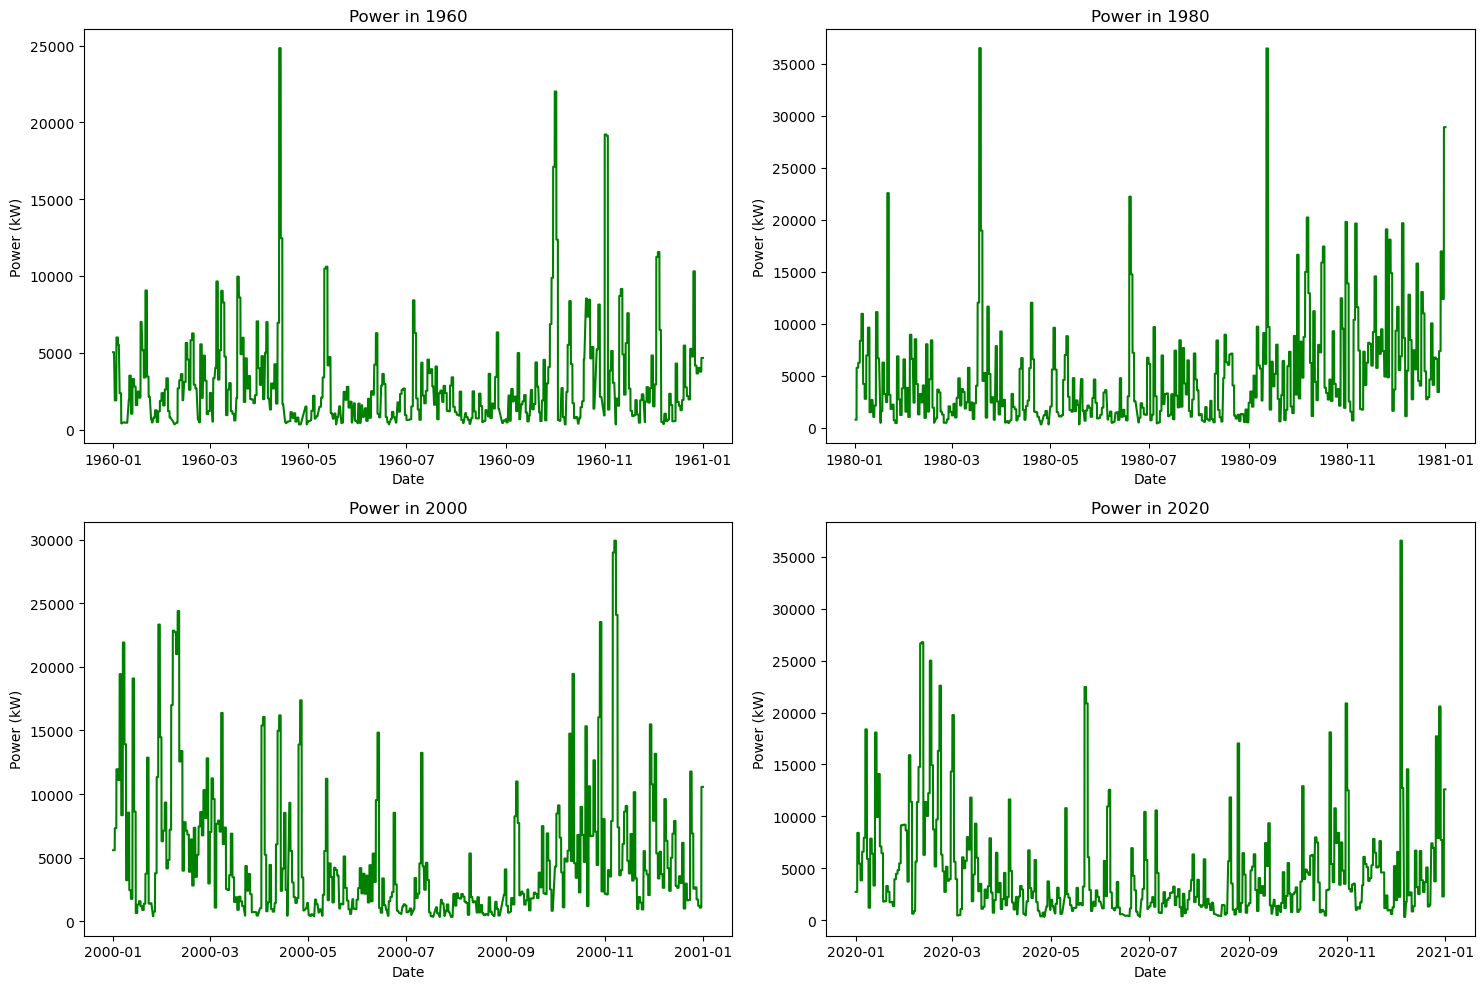

In [ ]:
# Years to check.
years = [1960, 1980, 2000, 2020]

# Filter the DataFrame for the specified years.
df_year = {year: dfwp[dfwp["date"].dt.year == year] for year in years}

# Create subplots for each year.
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a line plot for each year.
for ax, year in zip(axs.flatten(), years):
    sns.lineplot(x="date", y="daily_mean_power", data=df_year[year], ax=ax, color="green")
    ax.set_title(f"Power in {year}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Power (kW)")

# Adjust layout.
plt.tight_layout()

It's visible that in both years, the energy production in generally higher after September, and also rentable at the beginning of the year, before May. The worst months are in the middle of the year, between May and September.

### Wind Speed VS Power
The higher the wind speed, the higher the power production. To confirm this, I plotted both variables side by side. Since I wanted a resumed plot, I considered only the monthly means. For this, I calculated the monthly mean power produced and added a new column. Then, I created a new DataFrame with the years of the last decade, from 2014 till now. I defined each plot with seaborn and added a label on the y axis for each variable. The plt.twinx() mixed both plots, sharing the x axis. Then, I defined the title, the label for the x axis, legend and plotted.

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html 

In [21]:
# Calculate the monthly mean power.
monthly_mean_power = dfwp.groupby(months)["power_kw"].transform("mean")

# Create a new column.
dfwp["monthly_mean_power"] = monthly_mean_power

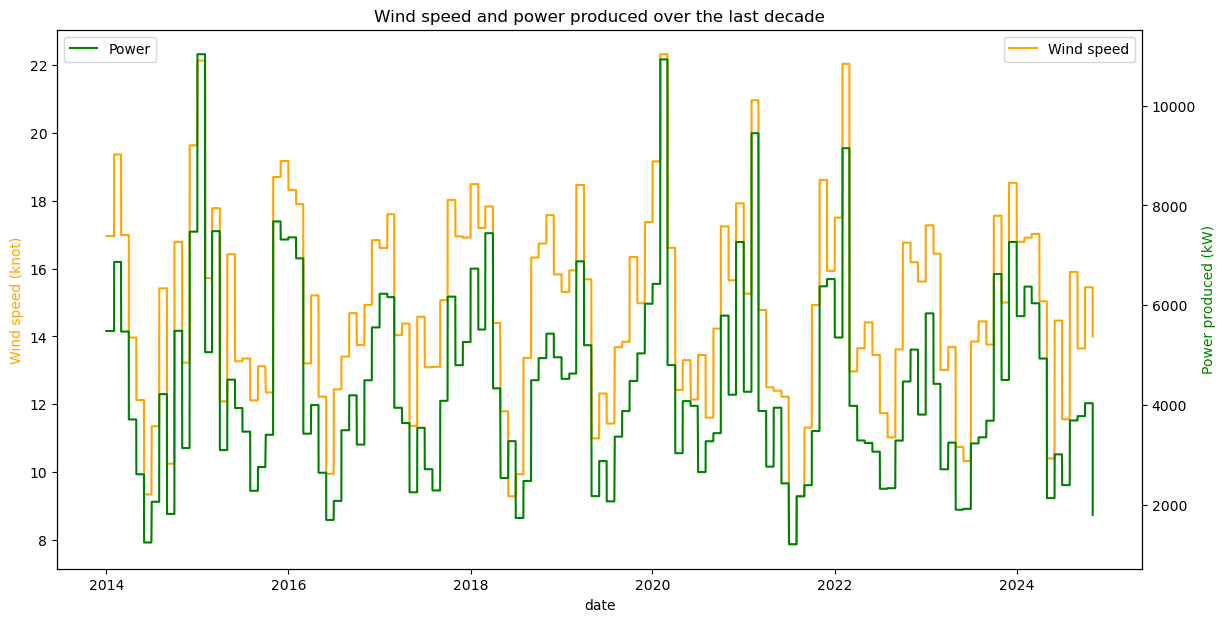

In [ ]:
# Last decade.
#dfdec=dfwp
dfdec = dfwp[dfwp["date"].dt.year >=2014]

# Set figure.
plt.figure(figsize=(14, 7))

# Plot for wind speed.
sns.lineplot(x="date", y="monthly_mean_wind", data=dfdec, label="Wind speed", color="orange")

# Label for wind speed.
plt.ylabel("Wind speed (knot)", color="orange")

# Create a twin Axes sharing the x-axis for 'temp'
ax2 = plt.twinx()

# Plot for power.
sns.lineplot(x="date", y="monthly_mean_power", data=dfdec, label="Power", color="green", ax=ax2)

# Label for power.
ax2.set_ylabel("Power produced (kW)", color="green")

# Add title.
plt.title("Wind speed and power produced over the last decade")

# Add x label.
plt.xlabel("Date")

# Add legend.
plt.legend(loc="upper left")


As expected, both plots show similar trends, but they're not completely the same either. For example, at the start of the years 2014 and 2018, the power produced was similar, but the wind speed was higher in 2014. Also, at the start of the years 2020 and 2022, it's highly visible that wind speed is almost the same, but the power generated was way lower in 2022.

### Correlation and regression
In this section, I calculated the correlation of the energy produced, considering each month. The correlation is equal to -0.073, which shows a weak correlation, which is why the regression line is convex. This result was expected because previous plots showed that the months in the middle of the year had the lowest energy production.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
https://seaborn.pydata.org/generated/seaborn.set_style.html
https://seaborn.pydata.org/generated/seaborn.lmplot.html

Power correlation per month is: -0.0732098822623549


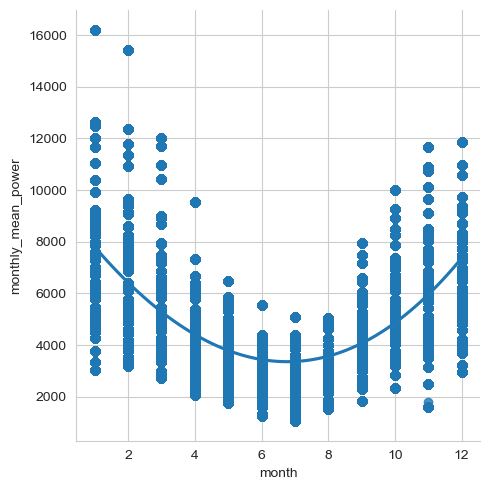

In [ ]:
# Create a column with the months.
dfwp["month"]= dfwp["date"].dt.month

# Calculate the correlation between month and wind speed, and print.
corrwind = dfwp["month"].corr(dfwp["monthly_mean_power"], method="pearson")
print (f"Power correlation per month is: {corrwind}")

# Set grid style.
sns.set_style("whitegrid")

# Define plot.
sns.lmplot(x="month", y="monthly_mean_power", order=3, data=dfwp)

### Scikit-Learn
Scikit-Learn "It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python"

https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm

I applied some of the scikit-learn features, in this case, the K-Nearest Neighbors. This method enables the classification and predictions in a certain data point. 

https://www.ibm.com/think/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20(KNN)%20algorithm%20is%20a%20non,used%20in%20machine%20learning%20today.

Then I applied the training machine learning model, where the data is split into training and test data.

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn#normalizing-&-splitting-the-data-whent

Then the StandardScaler will make the features in X with standard values, with normalization of data, so none of them will be too apart from each other.
https://www.geeksforgeeks.org/what-is-standardscaler/

The .fit_transform fits the X train with the standard deviation values.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

Then the .transform fits the X test values with the same mean and variance from the training data.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform
https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

After this, I can finally train the model with KNeighborsClassifier, fitting the training data with .fit.
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit

Then I calculated the prediction of y with .predict, considering the X test. 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict

After that, I calculated the efficacy of this K-Nearest Neighbors method with the accuracy_score, as this shows how many values the machine was able to predict correctly.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/1.5/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
https://www.askpython.com/python/examples/python-predict-function

In [24]:
# Import libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features X.
x = dfwp[["power_kw", "daily_mean_power", "monthly_mean_power"]]

# Define target y.
y = dfwp['month']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.metrics import accuracy_score

# Initialize the KNN classifier.
knn = KNeighborsClassifier()

# Train the model.
knn.fit(X_train, y_train)

# Make predictions.
y_pred = knn.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 54.74%


In [25]:
'''
clf = KNeighborsClassifier()

x = dfwp[['month', "wdsp"]]
y = dfwp['month']

clf = clf.fit(x, y)
print(clf.score(x,y))
'''

'\nclf = KNeighborsClassifier()\n\nx = dfwp[[\'month\', "wdsp"]]\ny = dfwp[\'month\']\n\nclf = clf.fit(x, y)\nprint(clf.score(x,y))\n'

In [26]:
from sklearn.linear_model import LinearRegression

x = dfwp[["power_kw", "daily_mean_power", "monthly_mean_power"]]
y = dfwp['month']

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")
#y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
#print(f"predicted response:\n{y_pred}")

# https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn


coefficient of determination: 0.0053596868608670745
intercept: 7.106629655370761
coefficients: [-7.00564030e-20 -9.82558219e-20 -1.12253312e-04]
predicted response:
[6.72100742 6.72100742 6.72100742 ... 6.65357011 6.65357011 6.90489317]


C:\Users\amand\AppData\Local\Temp\ipykernel_6244\3121949934.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


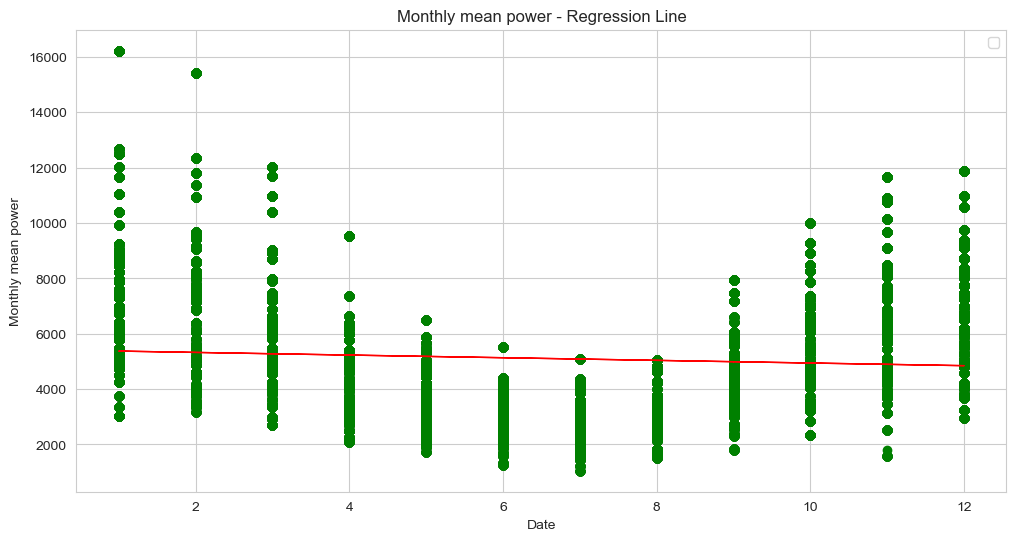

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = dfwp[["month"]]
y = dfwp["monthly_mean_power"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the model
y_pred = model.predict(X_test)

# Define figure size.
plt.figure(figsize=(12, 6))

# Plot the  values and regression line.
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, y_pred, color="red", linewidth=1)

# Add titles and labels.
plt.title("Monthly mean power - Regression Line")
plt.xlabel("Date")
plt.ylabel("Monthly mean power")
plt.legend()
plt.show()

# https://scikit-learn.org/1.5/auto_examples/linear_model/plot_ols.html
# https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html
# https://realpython.com/train-test-split-python-data/

C:\Users\amand\AppData\Local\Temp\ipykernel_6244\3424655929.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


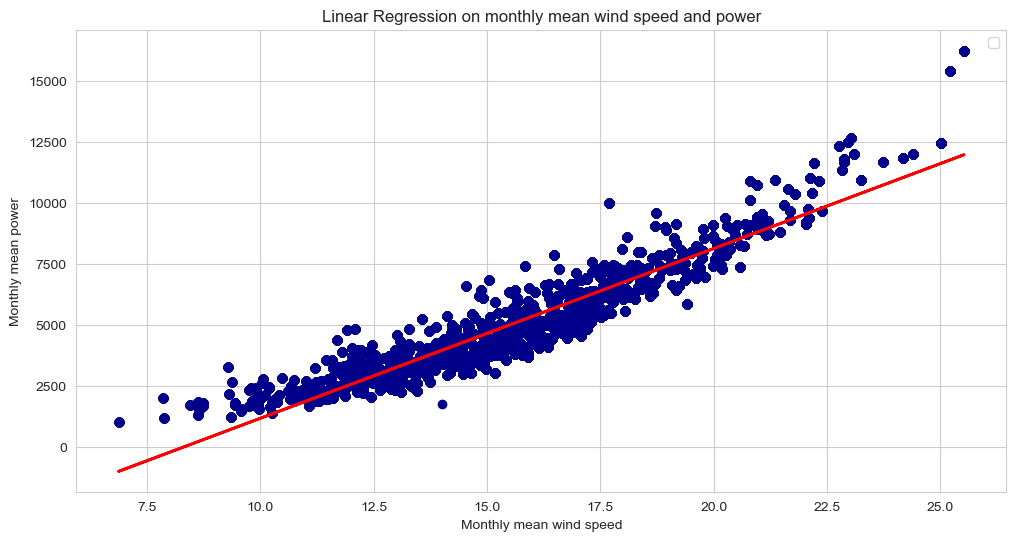

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = dfwp[["monthly_mean_wind"]]
y = dfwp ["monthly_mean_power"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the model
y_pred = model.predict(X_test)

# Plot the data and the regression line
plt.figure(figsize=(12, 6))

plt.scatter(X_test, y_test, color="darkblue")
plt.plot(X_test, y_pred, color="red", linewidth=2)

# Add titles and labels
plt.title("Linear Regression on monthly mean wind speed and power")
plt.xlabel("Monthly mean wind speed")
plt.ylabel("Monthly mean power")
plt.legend()

# Show the plot
plt.show()

In the next plot, I will do a scatter with the wind speed over time, with each value also including information of the power.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Monthly mean of Wind speed and power produced over the years'}, xlabel='date', ylabel='monthly_mean_wind'>

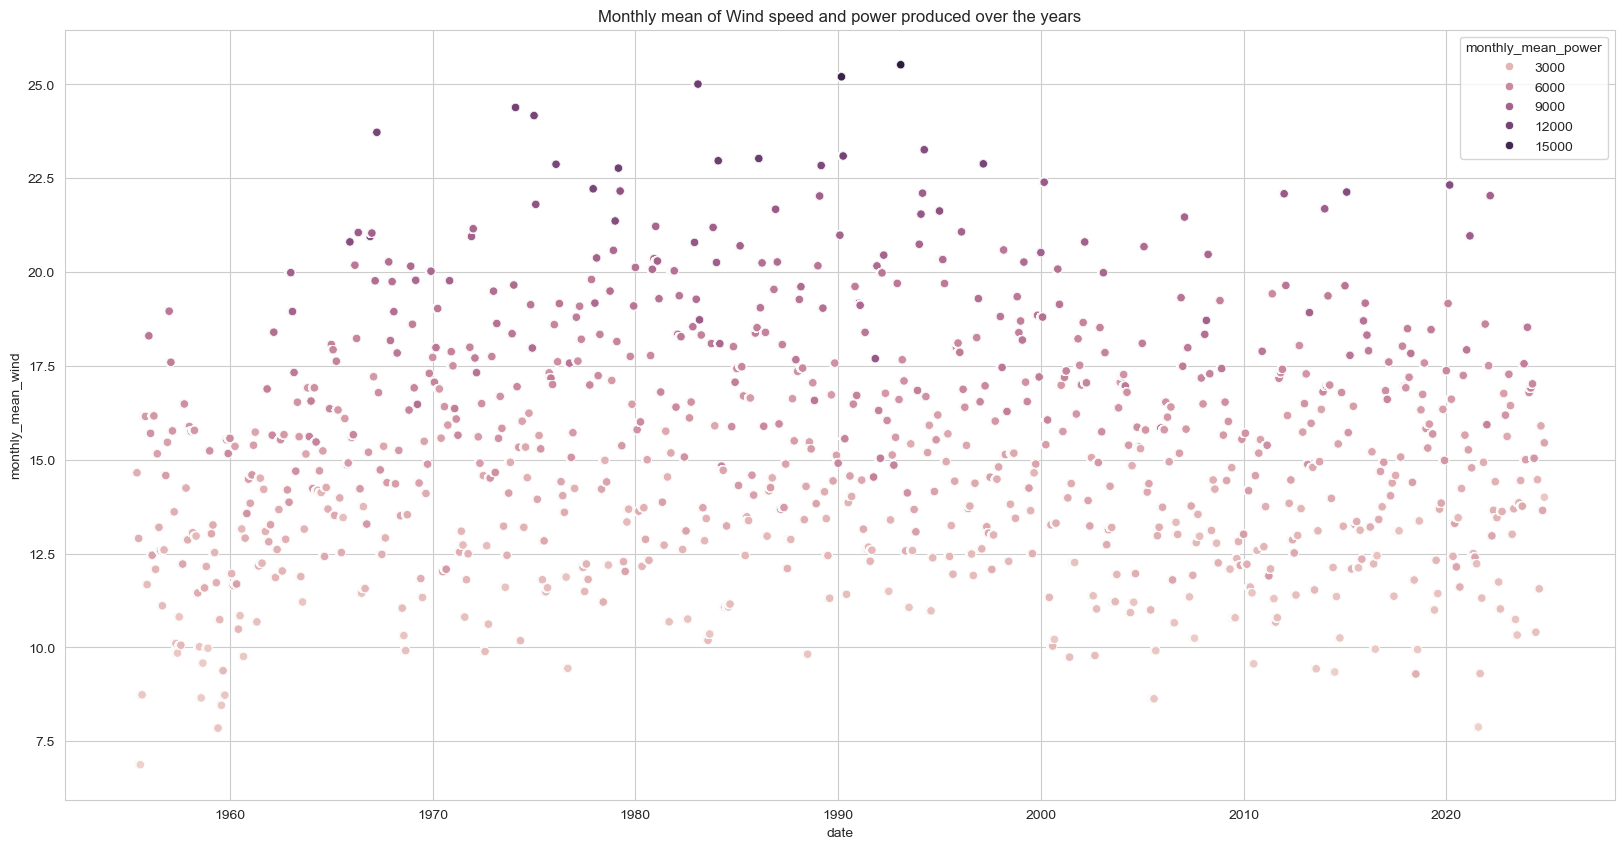

In [ ]:
plt.title("Monthly mean of Wind speed and power produced over the years")

sns.scatterplot(x=dfwp["date"],y=dfwp["monthly_mean_wind"], hue=dfwp["monthly_mean_power"])

#sns.scatterplot(x=dfwp["monthly_mean_power"],y=dfwp["monthly_mean_wind"], hue=dfwp["month"])

## Prediction
Are the wind speeds likely to be the same in 10 years in the future? is there a trend in recorded wind speeds over the last few decades? 

In [30]:
import numpy as np

# Generate future dates.
#future_dates = pd.date_range(start="2024-11-02 00:00:00", periods=10*365, freq='D')
future_dates = pd.date_range(start="2024-11-02 00:00:00", periods=7*24, freq='H')

# Generate future wdsp values (e.g., by adding a small random variation around the mean)
mean_wdsp = dfwp['daily_mean_wind'].mean()
std_wdsp = dfwp['daily_mean_wind'].std()
future_wdsp = np.random.normal(loc=mean_wdsp, scale=std_wdsp, size=len(future_dates))

# Create a DataFrame for the synthetic data
future_df = pd.DataFrame({
    'date': future_dates,
    'daily_mean_wind': future_wdsp
})

# Append the synthetic data to the original DataFrame
#extended_dfwp = pd.concat([dfwp, future_df])

# Display the first few rows of the extended DataFrame
#extended_dfwp

# Save the extended DataFrame to a new CSV file if needed
#extended_dfwp.to_csv('extended_hly1575.csv', index=False)
future_df
#https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html

C:\Users\amand\AppData\Local\Temp\ipykernel_6244\4010026494.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start="2024-11-02 00:00:00", periods=7*24, freq='H')


,date,daily_mean_wind
0,2024-11-02 00:00:00,17.871704
1,2024-11-02 01:00:00,26.251572
2,2024-11-02 02:00:00,14.993275
3,2024-11-02 03:00:00,8.300007
4,2024-11-02 04:00:00,10.484957
...,...,...
163,2024-11-08 19:00:00,4.634945
164,2024-11-08 20:00:00,10.593503
165,2024-11-08 21:00:00,27.088456
166,2024-11-08 22:00:00,17.306718


<Axes: title={'center': 'Future wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

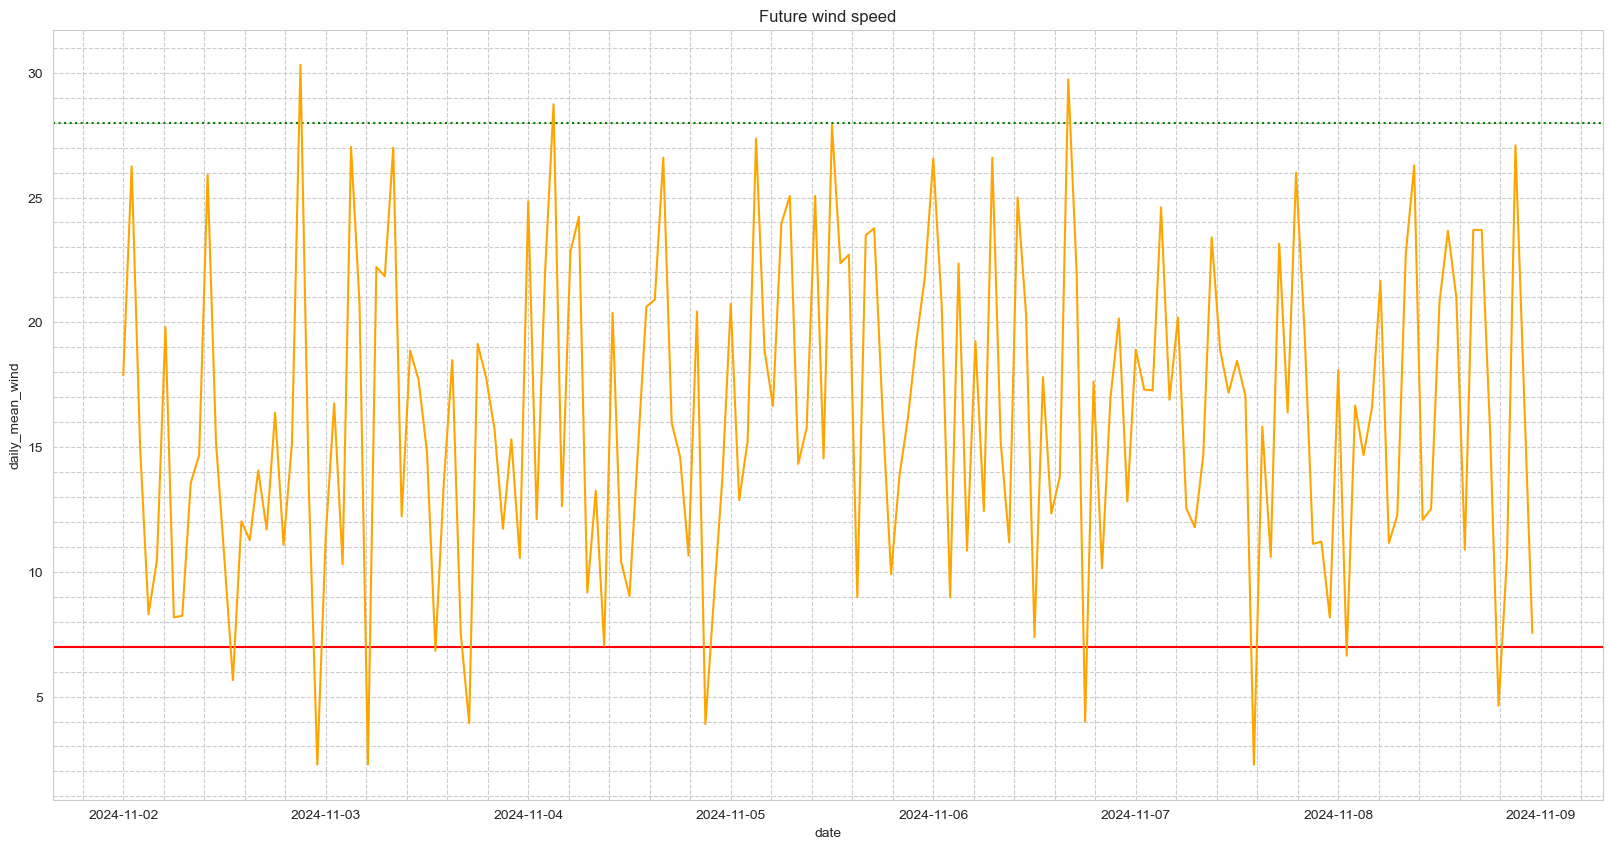

In [31]:
grid()
plt.title("Future wind speed")

#df_filtered = future_df[(future_df['date'] >= '2024-11-01') & (future_df['date'] <= '2034-11-01')]
#sns.lineplot(data=df_filtered, x="date", y="daily_mean_wind", color="purple")

sns.lineplot(data=future_df, x="date", y="daily_mean_wind", color="orange")

### Rain Temperature

In [32]:
dfrt=df[["date","rain", "temp"]]

dfrt["rain"] = pd.to_numeric(dfrt["rain"], errors="coerce")

# Drop the empty and 0 values.
dfrt = dfrt[dfrt["rain"] != " "]
dfrt = dfrt[dfrt["rain"] != 0]
dfrt = dfrt[dfrt["temp"] != " "]

C:\Users\amand\AppData\Local\Temp\ipykernel_6244\1574953982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrt["rain"] = pd.to_numeric(dfrt["rain"], errors="coerce")


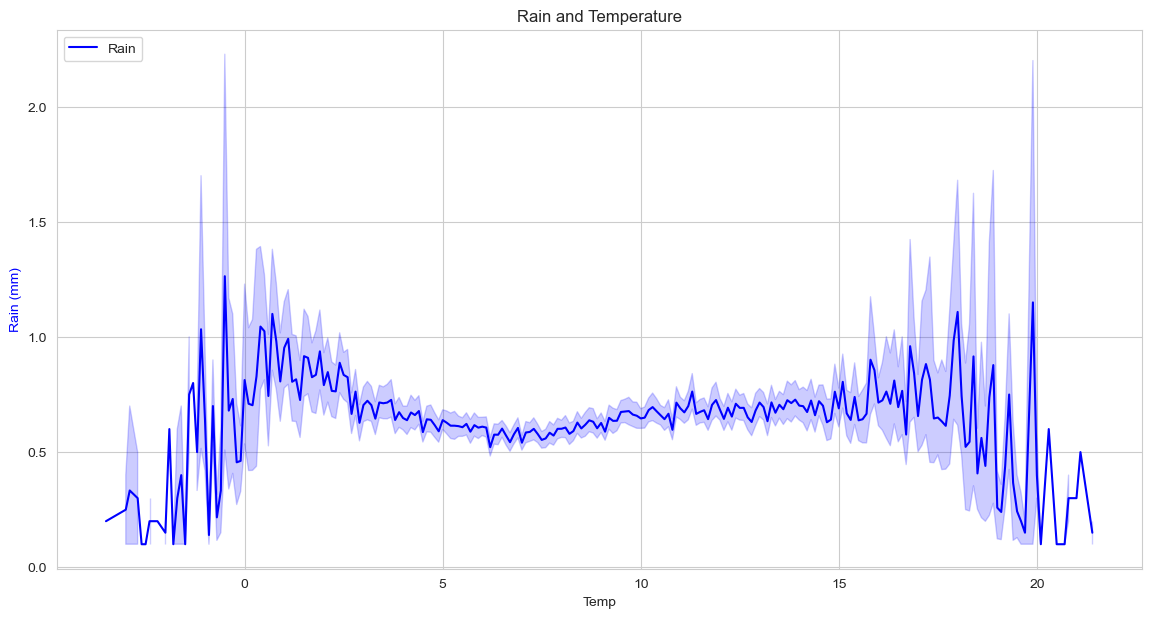

In [33]:
# Plot the data using seaborn
plt.figure(figsize=(14, 7))

# Plot.
sns.lineplot(x='temp', y='rain', data=dfrt, label='Rain', color='blue')

plt.ylabel('Rain (mm)', color='blue')

# Add titles and labels
plt.title('Rain and Temperature')
plt.xlabel('Temp')
plt.legend(loc='upper left')
plt.show()


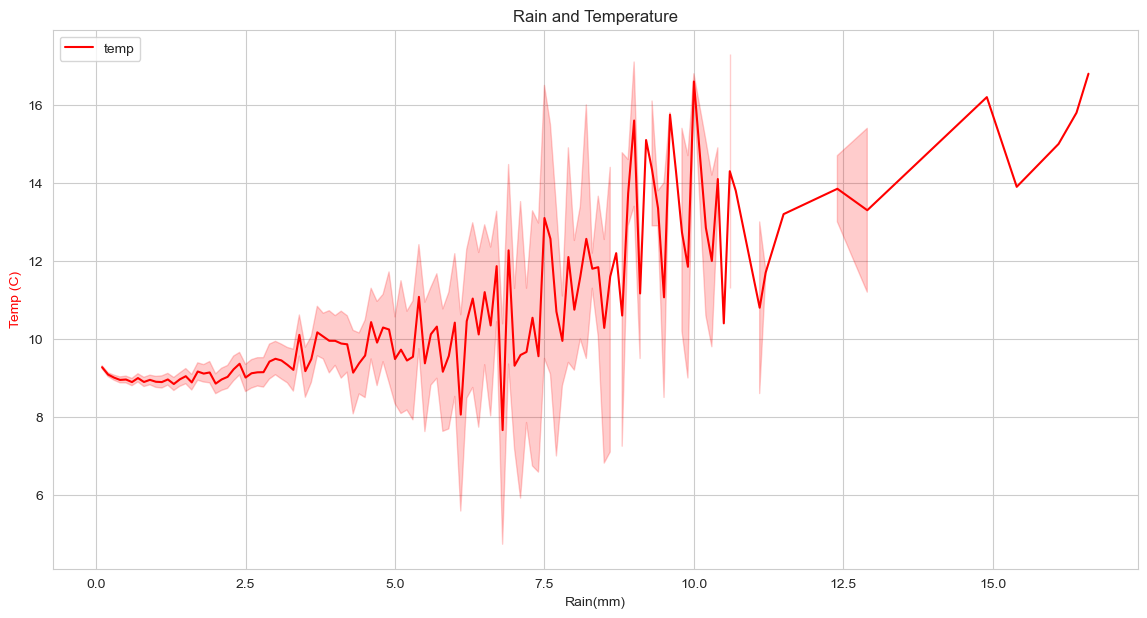

In [34]:
#Plot the data using seaborn
plt.figure(figsize=(14, 7))

# Plot
sns.lineplot(x='rain', y='temp', data=dfrt, label='temp', color='red')
plt.ylabel('Temp (C)', color='red')

# Add titles and labels
plt.title('Rain and Temperature')
plt.xlabel('Rain(mm)')
plt.legend(loc='upper left')
plt.show()


In [35]:
# Calculate the daily wind speed mean.
monthly_mean_rain = dfrt.groupby(months)["rain"].transform("mean")
monthly_mean_temp = dfrt.groupby(months)["temp"].transform("mean")

# Create a new column.
dfrt["monthly_mean_rain"] = monthly_mean_rain
dfrt["monthly_mean_temp"] = monthly_mean_temp

# Check
dfrt.head(3)

,date,rain,temp,monthly_mean_rain,monthly_mean_temp
5,1955-05-01 06:00:00,0.1,8.4,0.483448,8.049655
7,1955-05-01 08:00:00,0.1,9.2,0.483448,8.049655
8,1955-05-01 09:00:00,0.2,9.3,0.483448,8.049655


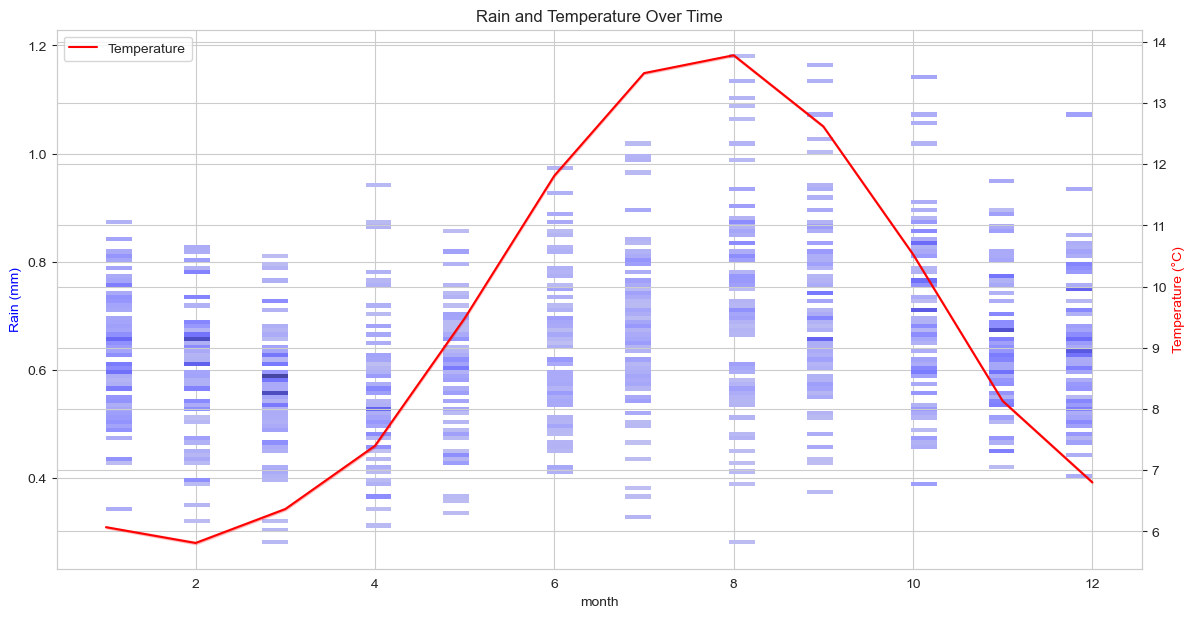

In [36]:
# Plot the data using seaborn
plt.figure(figsize=(14, 7))

# Plot rain
#sns.lineplot(x='date', y='monthly_mean_rain', data=dfrt, label='Rain', color='blue')
sns.histplot(x=dfwp['month'], y=dfrt['monthly_mean_rain'], label='Rain', color='blue', legend=True)
plt.ylabel('Rain (mm)', color='blue')

# Create a twin Axes sharing the x-axis for 'temp'
ax2 = plt.twinx()

# Plot for temperature
#sns.histplot(x='date', y='monthly_mean_temp', data=dfrt, label='Temperature', color='red', ax=ax2)
sns.lineplot(x=dfwp['month'], y=dfrt['monthly_mean_temp'], label='Temperature', color='red', ax=ax2)
ax2.set_ylabel('Temperature (°C)', color='red')

# Add titles and labels
plt.title('Rain and Temperature Over Time')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()

# https://seaborn.pydata.org/generated/seaborn.histplot.html


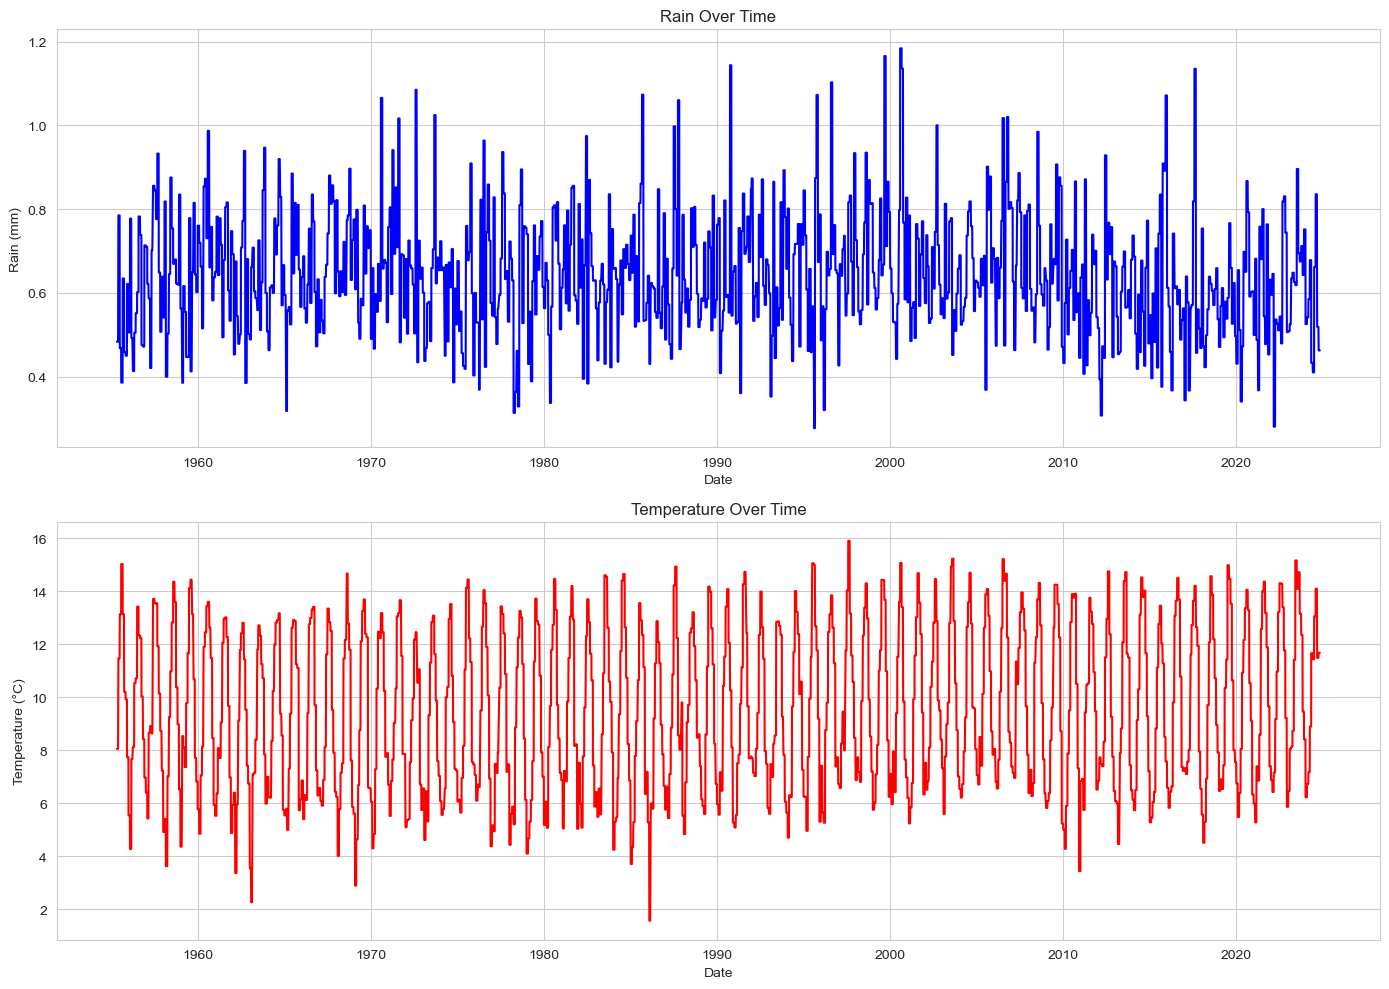

In [37]:
# Create subplots for a cleaner visual
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

#sns.scatterplot(x='monthly_mean_temp', y='monthly_mean_rain', data=dfrt, color='blue')

# Subplot for 'rain'
sns.lineplot(x='date', y='monthly_mean_rain', data=dfrt, ax=ax[0], color='blue')
ax[0].set_title('Rain Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Rain (mm)')

# Subplot for 'temp'
sns.lineplot(x='date', y='monthly_mean_temp', data=dfrt, ax=ax[1], color='red')
ax[1].set_title('Temperature Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Temperature (°C)')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

In [38]:
# Correlation between month and temperature.
#corrtemp = df["date"].corr(df["temp"])
#print(f"Temperature correlation per month is: {corrtemp}") 

----
## END